In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('C:\\Users\\Dell\\Desktop\\Files\\Flight_price.csv')
data.head()

,Airline name,Date of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,SpiceJet,12 Nov,New Delhi,Mumbai,18:55,21:05,2: 10,Non Stop,5950
1,SpiceJet,12 Nov,New Delhi,Mumbai,07:20,09:35,2: 15,Non Stop,5950
2,Go First,12 Nov,New Delhi,Mumbai,08:00,10:10,2: 10,Non Stop,5953
3,Go First,12 Nov,New Delhi,Mumbai,14:20,16:35,2: 15,Non Stop,5953
4,Go First,12 Nov,New Delhi,Mumbai,19:40,21:55,2: 15,Non Stop,5953


In [3]:
data.shape

(1511, 9)

In [4]:
data.columns

Index(['Airline name', 'Date of Journey', 'Source', 'Destination',
       'Departure Time', 'Arrival Time', 'Duration', 'Total Stops', 'Price'],
      dtype='object')

In [5]:
data.isnull().sum()

Airline name       0
Date of Journey    0
Source             0
Destination        0
Departure Time     0
Arrival Time       0
Duration           0
Total Stops        0
Price              0
dtype: int64

In [6]:
data.dtypes

Airline name       object
Date of Journey    object
Source             object
Destination        object
Departure Time     object
Arrival Time       object
Duration           object
Total Stops        object
Price               int64
dtype: object

# Data Cleaning

In [7]:
data['Departure Time']=pd.to_datetime(data['Departure Time'])
data['Departure_hour']=data['Departure Time'].dt.hour
data['Departure_min']=data['Departure Time'].dt.minute

In [8]:
data['Arrival Time']=pd.to_datetime(data['Arrival Time'])
data['Arrival hour']=data['Arrival Time'].dt.hour
data['Arrival min']=data['Arrival Time'].dt.minute

In [9]:
data=data.drop(['Departure Time','Arrival Time'],axis=1)
data.head()

,Airline name,Date of Journey,Source,Destination,Duration,Total Stops,Price,Departure_hour,Departure_min,Arrival hour,Arrival min
0,SpiceJet,12 Nov,New Delhi,Mumbai,2: 10,Non Stop,5950,18,55,21,5
1,SpiceJet,12 Nov,New Delhi,Mumbai,2: 15,Non Stop,5950,7,20,9,35
2,Go First,12 Nov,New Delhi,Mumbai,2: 10,Non Stop,5953,8,0,10,10
3,Go First,12 Nov,New Delhi,Mumbai,2: 15,Non Stop,5953,14,20,16,35
4,Go First,12 Nov,New Delhi,Mumbai,2: 15,Non Stop,5953,19,40,21,55


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline name     1511 non-null   object
 1   Date of Journey  1511 non-null   object
 2   Source           1511 non-null   object
 3   Destination      1511 non-null   object
 4   Duration         1511 non-null   object
 5   Total Stops      1511 non-null   object
 6   Price            1511 non-null   int64 
 7   Departure_hour   1511 non-null   int64 
 8   Departure_min    1511 non-null   int64 
 9   Arrival hour     1511 non-null   int64 
 10  Arrival min      1511 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 130.0+ KB


# Visualization of the data

IndiGo          767
Vistara         193
Go First        185
Air Asia        130
SpiceJet        118
Air India       112
Alliance Air      6
Name: Airline name, dtype: int64


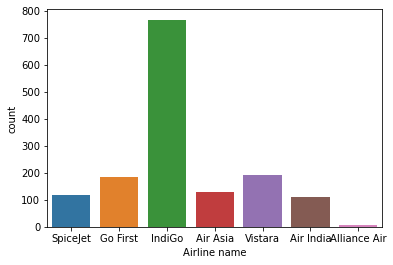

In [11]:
ax= sns.countplot(x='Airline name',data=data)
print(data['Airline name'].value_counts())

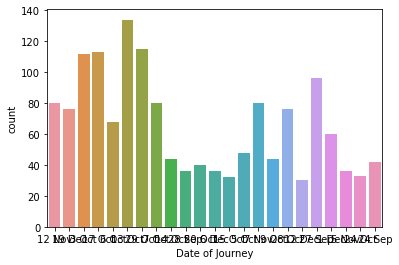

In [12]:
ax= sns.countplot(x='Date of Journey',data=data)

New Delhi    648
Mumbai       482
Bangalore    381
Name: Source, dtype: int64


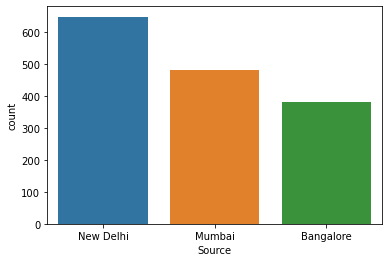

In [13]:
ax= sns.countplot(x='Source',data=data)
print(data['Source'].value_counts())

Kolkata       216
Mumbai        134
New Delhi     128
Bangalore     124
Hyderabad     110
Pune          107
Chennai       104
Goa            97
Jaipur         72
Ahmedabad      72
Srinagar       64
Guwahati       57
Patna          44
Varanasi       44
Kochi          40
Leh            36
Dehradun       32
Chandigarh     30
Name: Destination, dtype: int64


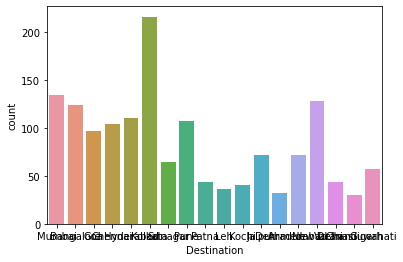

In [14]:
ax= sns.countplot(x='Destination',data=data)
print(data['Destination'].value_counts())

2: 15     170
2: 10     145
2: 50      75
2: 05      71
1: 35      62
         ... 
5: 40       3
5: 55       3
6: 10       3
7: 05       3
25: 30      3
Name: Duration, Length: 98, dtype: int64


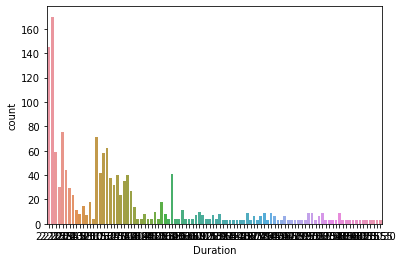

In [15]:
ax= sns.countplot(x='Duration',data=data)
print(data['Duration'].value_counts())

Non Stop    1133
1 Stop       372
2 Stop         6
Name: Total Stops, dtype: int64


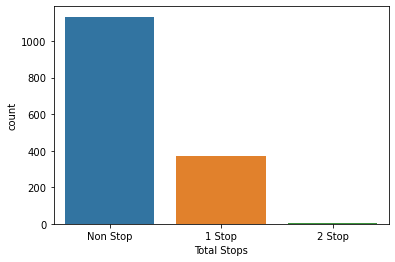

In [16]:
ax= sns.countplot(x='Total Stops',data=data)
print(data['Total Stops'].value_counts())

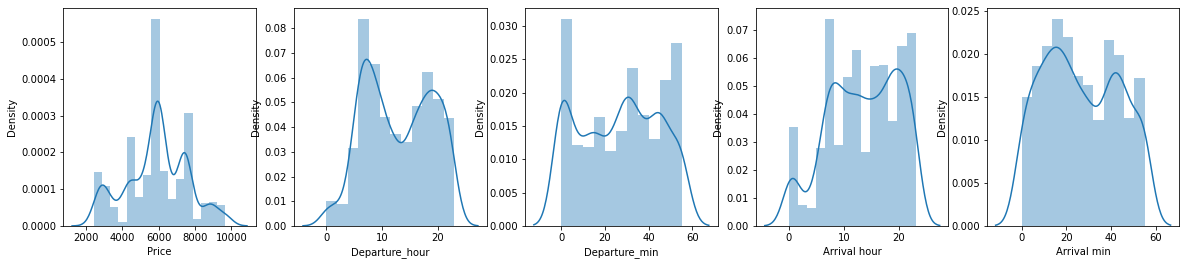

In [17]:
df=data[['Price','Departure_hour','Departure_min','Arrival hour','Arrival min']].copy()
 
plt.figure(figsize=(20,4))
num =1

for column in df:
    if num <=5:
        ax = plt.subplot(1,5,num)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        
    num+=1
plt.show()        

                                       Encoding Technique

In [18]:
enc=OrdinalEncoder()

In [19]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [20]:
data.head()

,Airline name,Date of Journey,Source,Destination,Duration,Total Stops,Price,Departure_hour,Departure_min,Arrival hour,Arrival min
0,5.0,2.0,2.0,12.0,38.0,2.0,5950,18,55,21,5
1,5.0,2.0,2.0,12.0,39.0,2.0,5950,7,20,9,35
2,3.0,2.0,2.0,12.0,38.0,2.0,5953,8,0,10,10
3,3.0,2.0,2.0,12.0,39.0,2.0,5953,14,20,16,35
4,3.0,2.0,2.0,12.0,39.0,2.0,5953,19,40,21,55


# Analysis

In [21]:
data.describe()

,Airline name,Date of Journey,Source,Destination,Duration,Total Stops,Price,Departure_hour,Departure_min,Arrival hour,Arrival min
count,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000,1511.000000
mean,3.636664,10.907346,1.176704,8.589014,40.689610,1.503640,5908.223031,12.841165,26.353408,13.485771,26.581734
std,1.625038,6.549912,0.806357,4.924717,19.483996,0.861898,1702.137586,6.069350,17.939510,6.313522,16.830272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2432.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,0.000000,5.000000,28.000000,1.500000,4695.000000,7.000000,10.000000,9.000000,12.500000
50%,4.000000,11.000000,1.000000,10.000000,38.000000,2.000000,5954.000000,12.000000,30.000000,14.000000,25.000000
75%,4.000000,16.000000,2.000000,13.000000,46.000000,2.000000,7413.000000,18.000000,40.000000,19.000000,40.000000
max,6.000000,22.000000,2.000000,17.000000,97.000000,2.000000,9678.000000,23.000000,55.000000,23.000000,55.000000


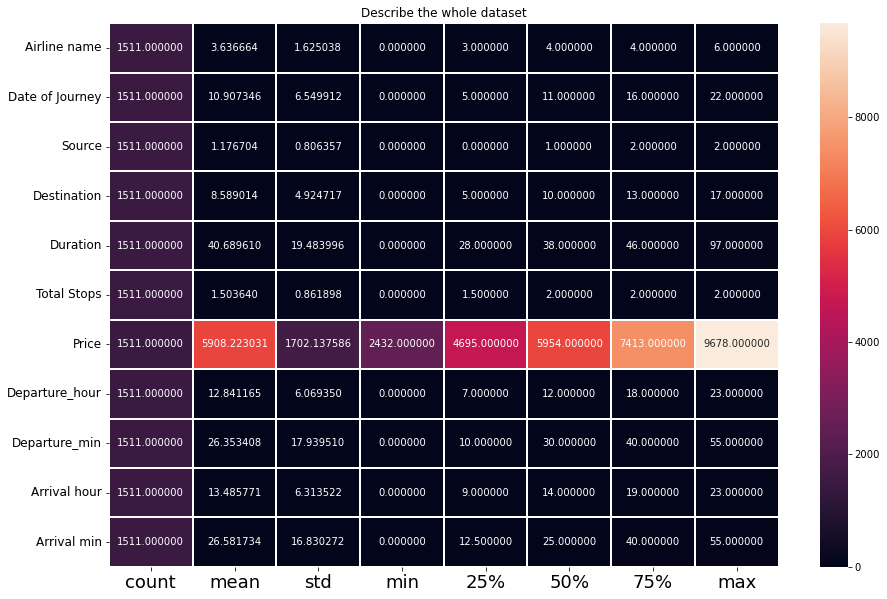

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(data.describe().transpose(),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Describe the whole dataset")
plt.show()

In [23]:
data.corr()

,Airline name,Date of Journey,Source,Destination,Duration,Total Stops,Price,Departure_hour,Departure_min,Arrival hour,Arrival min
Airline name,1.000000,-0.012373,0.121806,-0.065344,-0.032826,0.052720,0.115398,-0.021030,0.002908,0.087573,-0.021469
Date of Journey,-0.012373,1.000000,0.098899,0.170477,-0.214798,0.130977,0.008090,0.012807,0.044156,-0.036401,0.091564
Source,0.121806,0.098899,1.000000,0.062827,-0.174051,0.429301,-0.003732,-0.019701,-0.008761,0.003291,-0.075263
Destination,-0.065344,0.170477,0.062827,1.000000,-0.060065,-0.045596,0.096231,-0.032097,0.102137,-0.010316,-0.080841
Duration,-0.032826,-0.214798,-0.174051,-0.060065,1.000000,-0.477085,0.374014,-0.040173,-0.045037,0.032500,-0.045911
Total Stops,0.052720,0.130977,0.429301,-0.045596,-0.477085,1.000000,-0.326854,0.040369,0.019062,-0.018945,-0.003136
Price,0.115398,0.008090,-0.003732,0.096231,0.374014,-0.326854,1.000000,0.031354,-0.050497,0.084584,-0.027279
Departure_hour,-0.021030,0.012807,-0.019701,-0.032097,-0.040173,0.040369,0.031354,1.000000,0.055226,0.330955,-0.067331
Departure_min,0.002908,0.044156,-0.008761,0.102137,-0.045037,0.019062,-0.050497,0.055226,1.000000,0.006938,0.026410
Arrival hour,0.087573,-0.036401,0.003291,-0.010316,0.032500,-0.018945,0.084584,0.330955,0.006938,1.000000,0.046955


<AxesSubplot:>

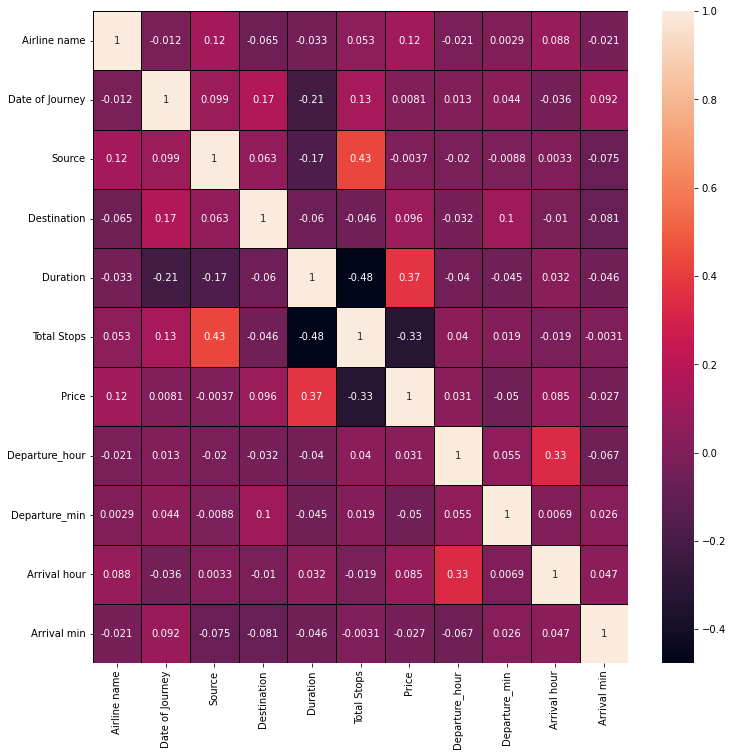

In [24]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,linecolor='black')

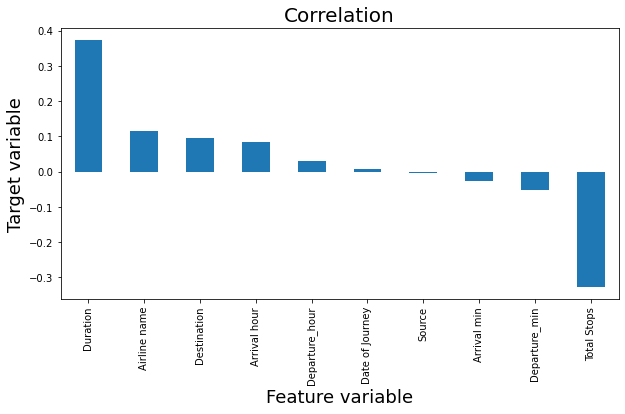

In [25]:
plt.figure(figsize=(10,5))
data.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('Feature variable',fontsize=18)
plt.ylabel('Target variable',fontsize=18)
plt.title('Correlation',fontsize=20)
plt.show()

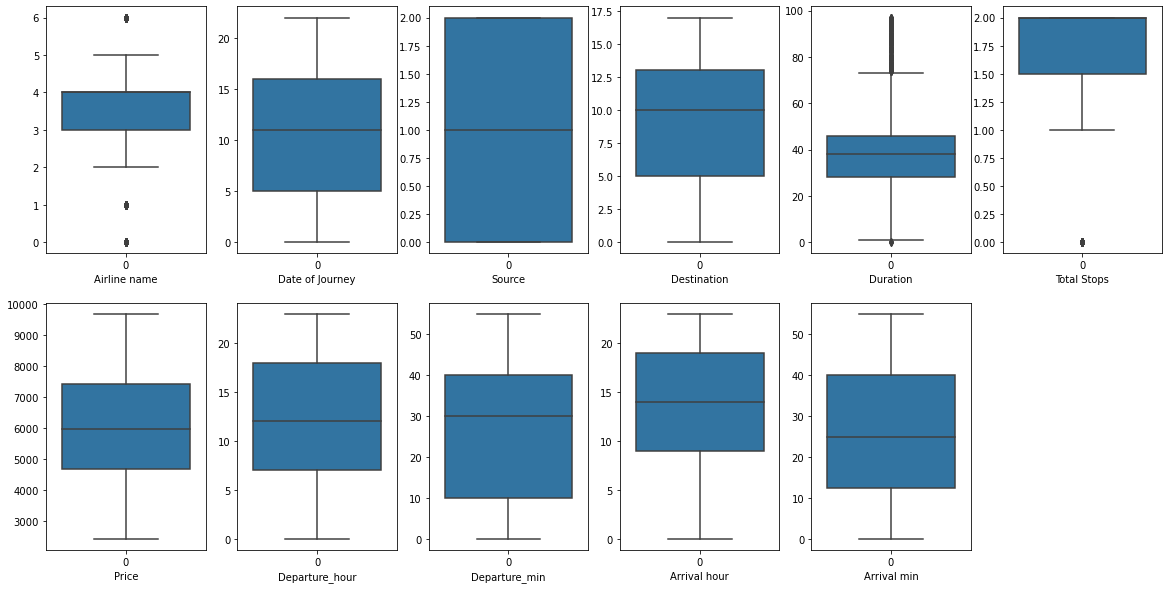

In [26]:
plt.figure(figsize=(20,10))
number = 1

for column in data:
    if number <=11:
        plt.subplot(2,6,number)
        ax = sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=10)
       
    number+=1
plt.show()    

There are no outliers in the dataset.

In [27]:
data.skew()

Airline name      -0.849302
Date of Journey    0.019809
Source            -0.331135
Destination       -0.170809
Duration           1.046123
Total Stops       -1.167096
Price             -0.072026
Departure_hour    -0.002518
Departure_min     -0.037440
Arrival hour      -0.310900
Arrival min        0.127123
dtype: float64

Take threshold range for the skewness is (-0.5,0.5)

And we see that the data is not skewed.

# Model Testing

In [28]:
x=data.drop(['Price'],axis=1)
y=data['Price']

# Linear Regression

In [31]:
lr=LinearRegression()

In [34]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    lr.fit(x_train,y_train)
    pred1_train=lr.predict(x_train)
    pred1_test=lr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred1_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred1_test)*100)
    print('\n')

random state 0
Training accuracy score: 21.70976747147183
Testing accuracy score: 24.120422887847926


random state 1
Training accuracy score: 23.65978162312142
Testing accuracy score: 19.173057459604347


random state 2
Training accuracy score: 22.182736070590224
Testing accuracy score: 22.60623531303777


random state 3
Training accuracy score: 23.987315159301627
Testing accuracy score: 17.954064390919644


random state 4
Training accuracy score: 22.759967454281615
Testing accuracy score: 20.865000937826373


random state 5
Training accuracy score: 23.654043346045317
Testing accuracy score: 18.681165328847747


random state 6
Training accuracy score: 22.718619326713274
Testing accuracy score: 22.25934487987331


random state 7
Training accuracy score: 22.841530829628176
Testing accuracy score: 21.46924906755281


random state 8
Training accuracy score: 20.841264014714977
Testing accuracy score: 26.916599492171688


random state 9
Training accuracy score: 23.100574780971094
Testing ac

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =63)

In [36]:
pred1_test=lr.predict(x_test)
accuracy=r2_score(y_test,pred1_test)*100
print("R square score for testing",accuracy)

R square score for testing 23.283577942088296


                                   Cross Validation Score

In [37]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.21075746205670787


At cross fold 3 the cv score is 0.19439638414490537


At cross fold 4 the cv score is 0.2107852760297334


At cross fold 5 the cv score is 0.16258012855163417


At cross fold 6 the cv score is 0.15122541129462302


At cross fold 7 the cv score is 0.1557848257132333


At cross fold 8 the cv score is 0.01062207959466728


At cross fold 9 the cv score is 0.01268528724804241




In [38]:
lrscore=cross_val_score(lr,x,y,cv=4)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 21.07852760297334


In [39]:
mae=mean_absolute_error(y_test,pred1_test)
mse=mean_squared_error(y_test,pred1_test)
rmse=np.sqrt(mean_squared_error(y_test,pred1_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 1147.7897252818675
Mean square error: 2123396.4062461634
Root mean square error: 1457.187841785047


The score of Linear regression is very poor so we regualarize to increase the score.

                                       Regularization

In [40]:
from sklearn.linear_model import Lasso

In [41]:
parameters = {'alpha':[.0001,.001,.01,.1,1,10,100],
              'max_iter':range(0,100),
              'random_state':range(0,10),
              'normalize':[True,False]}

In [42]:
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'max_iter': 11, 'normalize': True, 'random_state': 0}


In [43]:
ls=Lasso(alpha=0.1,max_iter=11,normalize=True,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss = r2_score(y_test,pred_ls)*100
print("r2_score",lss)

cv_score=cross_val_score(ls,x,y,cv=4)
cv_mean=cv_score.mean()*100
print("cv_score",cv_mean)

r2_score 22.406644787437003
cv_score 21.074050581170216


There is not improvement in the score after tuning.

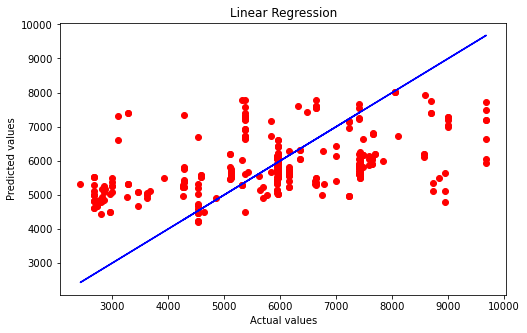

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred_ls,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')                                                                                
plt.show()

# Decision Tree Regression

In [45]:
dtr=DecisionTreeRegressor()

In [46]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    dtr.fit(x_train,y_train)
    pred2_train=dtr.predict(x_train)
    pred2_test=dtr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred2_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred2_test)*100)
    print('\n')

random state 0
Training accuracy score: 100.0
Testing accuracy score: 100.0


random state 1
Training accuracy score: 100.0
Testing accuracy score: 96.60720773149228


random state 2
Training accuracy score: 100.0
Testing accuracy score: 98.88946830858968


random state 3
Training accuracy score: 100.0
Testing accuracy score: 99.96474330865627


random state 4
Training accuracy score: 100.0
Testing accuracy score: 99.9787989244165


random state 5
Training accuracy score: 100.0
Testing accuracy score: 99.98118879815763


random state 6
Training accuracy score: 100.0
Testing accuracy score: 98.56905893605585


random state 7
Training accuracy score: 100.0
Testing accuracy score: 100.0


random state 8
Training accuracy score: 100.0
Testing accuracy score: 95.66935135926991


random state 9
Training accuracy score: 100.0
Testing accuracy score: 99.99999890948607


random state 10
Training accuracy score: 100.0
Testing accuracy score: 99.93019010091298


random state 11
Training accuracy 

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =97)

In [48]:
pred2_test=dtr.predict(x_test)
dtrs=r2_score(y_test,pred2_test)
print("R2 score:",dtrs*100)

R2 score: 100.0


In [49]:
for j in range(2,10):
    cv_score=cross_val_score(dtr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 1.0


At cross fold 3 the cv score is 1.0


At cross fold 4 the cv score is 1.0


At cross fold 5 the cv score is 1.0


At cross fold 6 the cv score is 1.0


At cross fold 7 the cv score is 1.0


At cross fold 8 the cv score is 1.0


At cross fold 9 the cv score is 1.0




In [ ]:
dtrscore=cross_val_score(dtr,x,y,cv=8)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

In [50]:
mae=mean_absolute_error(y_test,pred2_test)
mse=mean_squared_error(y_test,pred2_test)
rmse=np.sqrt(mean_squared_error(y_test,pred2_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 0.0
Mean square error: 0.0
Root mean square error: 0.0


Both trained and test data is 100 which means data is overfitting.So, it may not conclude as a good model.

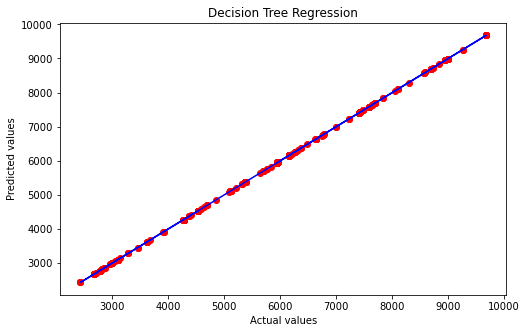

In [51]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred2_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Decision Tree Regression')                                                                                
plt.show()

# Random Forest Regression

In [52]:
rfr=RandomForestRegressor()

In [53]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    rfr.fit(x_train,y_train)
    pred3_train=rfr.predict(x_train)
    pred3_test=rfr.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred3_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred3_test)*100)
    print('\n')

random state 0
Training accuracy score: 99.77997457925999
Testing accuracy score: 99.02150911866032


random state 1
Training accuracy score: 99.81719523028225
Testing accuracy score: 96.23579393989232


random state 2
Training accuracy score: 99.81339084033168
Testing accuracy score: 98.96578732524523


random state 3
Training accuracy score: 99.89000052277059
Testing accuracy score: 99.51692976473768


random state 4
Training accuracy score: 99.76559034767172
Testing accuracy score: 98.77854465591423


random state 5
Training accuracy score: 99.89490164803591
Testing accuracy score: 99.5222871379404


random state 6
Training accuracy score: 99.87373212194251
Testing accuracy score: 98.37235633496948


random state 7
Training accuracy score: 99.8844430123491
Testing accuracy score: 99.58025467411694


random state 8
Training accuracy score: 99.82976077632476
Testing accuracy score: 97.22944245059212


random state 9
Training accuracy score: 99.88020780468746
Testing accuracy score: 99

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =9)

In [55]:
pred3_test=rfr.predict(x_test)
rfrs=r2_score(y_test,pred3_test)
print("R2 score for testing:",rfrs*100)

R2 score for testing: 99.8777051767223


In [57]:
for j in range(2,10):
    cv_score=cross_val_score(rfr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.9914572280467234


At cross fold 3 the cv score is 0.9981120010697234


At cross fold 4 the cv score is 0.9985358837662001


At cross fold 5 the cv score is 0.9983452511674729


At cross fold 6 the cv score is 0.9985359892130686


At cross fold 7 the cv score is 0.9988037322175062


At cross fold 8 the cv score is 0.9985211247294652


At cross fold 9 the cv score is 0.9983554338294639




In [59]:
rfrscore=cross_val_score(rfr,x,y,cv=6)
rfrc=rfrscore.mean()
print('cross val score:',rfrc*100)

cross val score: 99.86869057320176


In [60]:
mae=mean_absolute_error(y_test,pred3_test)
mse=mean_squared_error(y_test,pred3_test)
rmse=np.sqrt(mean_squared_error(y_test,pred3_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 26.757460317460346
Mean square error: 3560.1336322751354
Root mean square error: 59.66685539120639


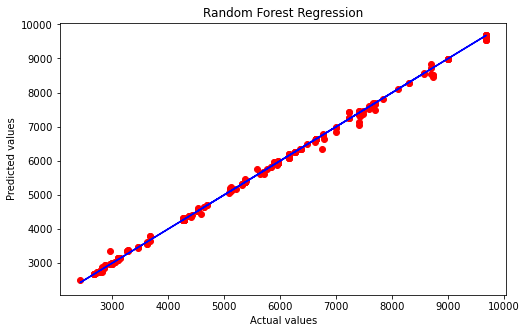

In [61]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred3_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest Regression')                                                                                
plt.show()

This model gives better score and have least difference between actual and predicted values. Also have very less error.

# Gradient Boosting Regression

In [62]:
gb= GradientBoostingRegressor()

In [63]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = i)
    gb.fit(x_train,y_train)
    pred4_train=gb.predict(x_train)
    pred4_test=gb.predict(x_test)
    print("random state",i)
    print("Training accuracy score:",r2_score(y_train,pred4_train)*100)
    print("Testing accuracy score:",r2_score(y_test,pred4_test)*100)
    print('\n')

random state 0
Training accuracy score: 95.79851051030576
Testing accuracy score: 93.14954398049451


random state 1
Training accuracy score: 96.63945730287887
Testing accuracy score: 92.85010707586261


random state 2
Training accuracy score: 95.74724801482051
Testing accuracy score: 95.79388611885754


random state 3
Training accuracy score: 95.64336722077343
Testing accuracy score: 93.75261363669463


random state 4
Training accuracy score: 95.70324098999536
Testing accuracy score: 94.95449853674741


random state 5
Training accuracy score: 95.8844762054161
Testing accuracy score: 96.06832685636282


random state 6
Training accuracy score: 95.89876395598307
Testing accuracy score: 94.86904184198737


random state 7
Training accuracy score: 95.9964858801737
Testing accuracy score: 94.94100181184349


random state 8
Training accuracy score: 95.86680488822549
Testing accuracy score: 93.77724343506232


random state 9
Training accuracy score: 95.77261041020554
Testing accuracy score: 95

In [64]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 19)

In [65]:
pred4_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred4_test)*100
print("R square score",accuracy)

R square score 96.20185722723163


In [66]:
for j in range(2,10):
    cv_score=cross_val_score(gb,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.9543751004110081


At cross fold 3 the cv score is 0.9571986160569389


At cross fold 4 the cv score is 0.9560530373595525


At cross fold 5 the cv score is 0.9509291339177022


At cross fold 6 the cv score is 0.9506938747426658


At cross fold 7 the cv score is 0.9477674919380281


At cross fold 8 the cv score is 0.9425478607147187


At cross fold 9 the cv score is 0.9418515068526195




In [67]:
gbscore=cross_val_score(gb,x,y,cv=3)
gbc=gbscore.mean()
print('cross val score:',gbc*100)

cross val score: 95.7198616056939


In [69]:
mae=mean_absolute_error(y_test,pred4_test)
mse=mean_squared_error(y_test,pred4_test)
rmse=np.sqrt(mean_squared_error(y_test,pred4_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 219.2085440421185
Mean square error: 102962.98766979527
Root mean square error: 320.87846245860015


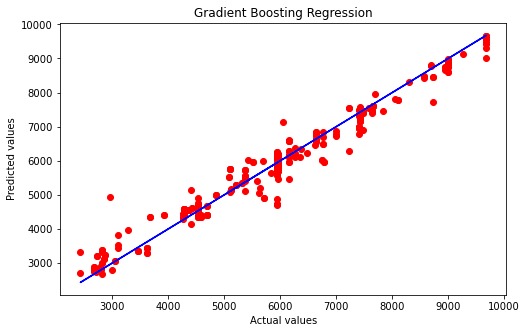

In [70]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred4_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Gradient Boosting Regression')                                                                                
plt.show()

The score of this model is also good but not that much as Random Forest Regression give us.

The better model for the Flight Price Prediction is 

# Random Forest Regression